Part 1

**Practice 1**

In [ ]:
### practice 1.1: Define dataframe
import pandas as pd
import matplotlib.pyplot as plt

sample_data = """12239.894 4.9
27195.197 5.8
37675.006 6.5
50961.865 7.3
55805.204 7.2"""

sample_data_list = [row.split(' ') for row in sample_data.split("\n")]

data = pd.DataFrame(sample_data_list, columns = ["GDP per capita", 'Life satisfaction'])

data.index = ['Country_'+str(i) for i in range(1, len(data.index)+1)]

data = data.astype(float)
data

,GDP per capita,Life satisfaction
Country_1,12239.894,4.9
Country_2,27195.197,5.8
Country_3,37675.006,6.5
Country_4,50961.865,7.3
Country_5,55805.204,7.2


(0.0, 60000.0, 0.0, 10.0)

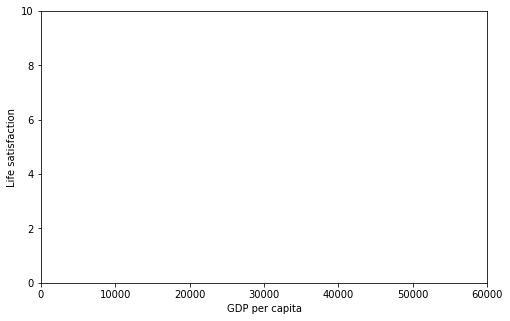

In [ ]:
### practice 1.2: visualize the data points
data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,5), color='white')
plt.axis([0, 60000, 0, 10])

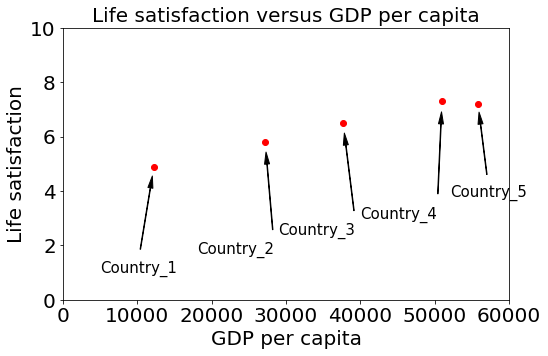

In [ ]:
### practice 1.2: visualize the data points
data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,5), color='white')
plt.axis([0, 60000, 0, 10])
# define text position
position_text = {
"Country_1": (5000, 1),
"Country_2": (18000, 1.7),
"Country_3": (29000, 2.4),
"Country_4": (40000, 3.0),
"Country_5": (52000, 3.8),
}

for country, pos_text in position_text.items():
  # plot point
  pos_data_x, pos_data_y = data.loc[country]
  plt.plot(pos_data_x, pos_data_y, "ro")

  # add text
  plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
  arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5), fontsize=15)

plt.xlabel("GDP per capita", size=20)
plt.xticks(fontsize=20)
plt.ylabel("Life satisfaction", size=20)
plt.yticks(fontsize=20)
plt.title("Life satisfaction versus GDP per capita", size = 20)
plt.show()

**Practice 2**

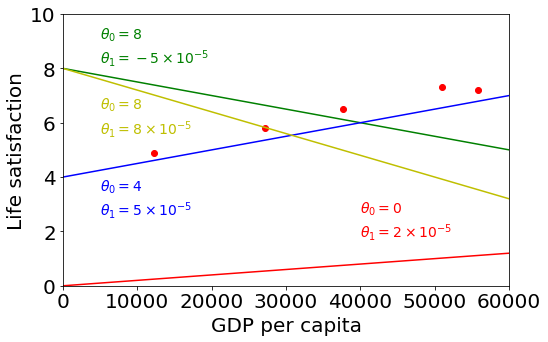

In [ ]:
#Practice 2: draw linear lines on data
import numpy as np
data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,5), color='white')
plt.axis([0, 60000, 0, 10])

for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = data.loc[country]
    plt.plot(pos_data_x, pos_data_y, "ro")

X=np.linspace(0, 60000, 1000)

## add line 1 with equation Y = 2*X/100000
plt.plot(X, 2*X/100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")

## add line 2 with equation Y = 8 - 5*X/100000
plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")

## add line 3 with equation Y = 4 + 5*X/100000
plt.plot(X, 4 + 5*X/100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")

## add line 4 with equation Y = 8 - 8*X/100000
plt.plot(X, 8 - 8*X/100000, "y")
plt.text(5000, 6.5, r"$\theta_0 = 8$", fontsize=14, color="y")
plt.text(5000, 5.6, r"$\theta_1 = 8 \times 10^{-5}$", fontsize=14, color="y")

plt.xlabel("GDP per capita", size=20)
plt.xticks(fontsize=20)
plt.ylabel("Life satisfaction", size=20)
plt.yticks(fontsize=20)

plt.show()

**Practice 3: Learn the optimal linear regression line**

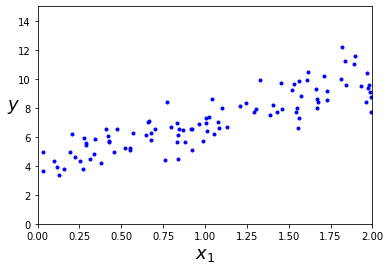

In [ ]:
# practice 3.1: simulate the data points for linear regression
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### generate simulated data points
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

### generate plots
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
### practice 3.2: Find the optimal linear regression line using Scikit-Learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("intercept_: ",lin_reg.intercept_)
print("coef_: ",lin_reg.coef_)

intercept_:  [4.05511993]
coef_:  [[2.96848785]]


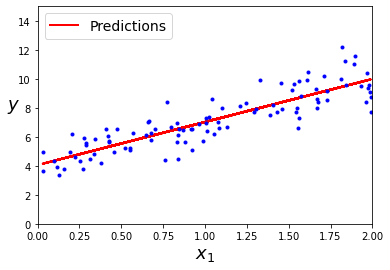

In [ ]:
### practice 3.3: draw the optimal linear regression line 
#### Draw linear Line
y_predict = lin_reg.predict(X)

plt.plot(X, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

**Practice 4: calculate mean square errora**

In [ ]:
# Practice 4.1:define features and labels

import pandas as pd

dataset = pd.DataFrame(
 {'Feature1': [0.1, 0.5, 1.5, 2.5],
  'Actual_label': [2.1, 2.6, 2.3, 2.2],
 }
)

dataset

,Feature1,Actual_label
0,0.1,2.1
1,0.5,2.6
2,1.5,2.3
3,2.5,2.2


In [ ]:
# Practice 4.2: define parameters
theta0 = 0.5
theta1 = 4.0

In [ ]:
# Practice 4.3: calculate squared error
squared_error = []
for i in dataset.index:
   x1 = dataset['Feature1'].iloc[i]
   y = dataset['Actual_label'].iloc[i]
   squared_error.append((y - theta0 - theta1*x1)**2)

# calculate mean squared error
mse = np.mean(squared_error)
print("mse: ", mse)

mse:  21.995000000000005


Part 2

**Practice 3: Generate simulated dataset**

In [1]:
## Practice 3.1:Generate simulated training/testing dataset
import numpy as np
import numpy.random as rnd

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

m = 20

X_test = 6 * np.random.rand(m, 1) - 3
y_test = 0.5 * X_test**2 + X_test + 2 + np.random.randn(m, 1)

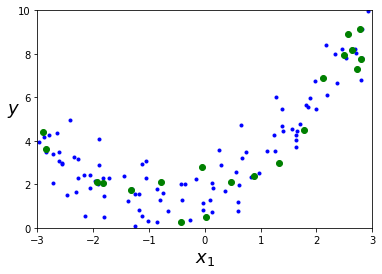

In [2]:

## practice 3.2: visualize the training & testing set
import matplotlib
import matplotlib.pyplot as plt
plt.plot(X, y, "b.")
plt.plot(X_test, y_test, "g.", markersize=12)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

**Practice 4: Fit/Evaluate the regression model on the training data**

[3.56401543] [[0.84362064]]
y_predict: [[2.92897216]
 [5.84540677]
 [4.73830469]
 [4.06339743]
 [1.82287679]
 [1.8227547 ]
 [1.32715672]
 [5.41749795]
 [4.07583169]
 [4.61722136]
 [1.13734654]
 [5.94256933]
 [5.24674827]
 [2.10795545]
 [1.95350129]
 [1.96149649]
 [2.57314373]
 [3.68932565]
 [3.21953991]
 [2.50727499]
 [4.13018389]
 [1.73923291]
 [2.51190904]
 [2.88757599]
 [3.34165382]
 [5.00749739]
 [2.04384706]
 [3.63606623]
 [4.03179246]
 [1.26827268]
 [4.10837777]
 [1.89629954]
 [1.36242671]
 [5.83615005]
 [5.92091619]
 [5.12503764]
 [2.57502429]
 [1.52754278]
 [4.49655213]
 [3.26108388]
 [1.65087736]
 [3.53960228]
 [1.20721871]
 [5.63588226]
 [2.34302632]
 [4.38665835]
 [2.6109489 ]
 [3.66559421]
 [3.80044996]
 [1.96883572]
 [5.94092313]
 [4.9566618 ]
 [5.78863769]
 [5.56252244]
 [4.05955809]
 [5.6994263 ]
 [1.48107812]
 [2.02516464]
 [1.26208156]
 [2.6798858 ]
 [3.00053061]
 [2.40664738]
 [5.22799391]
 [2.83894033]
 [2.45516642]
 [3.78013121]
 [1.74647302]
 [5.09365309]
 [1.41050

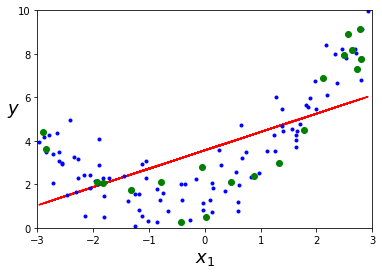

In [3]:
##Practice 4.1: Fit the regression model on the training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(lin_reg.intercept_, lin_reg.coef_)
y_predict = lin_reg.predict(X)

print("y_predict:",y_predict)

plt.plot(X, y_predict, "r-")
plt.plot(X, y, "b.")
plt.plot(X_test, y_test, "g.", markersize=12)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()


In [4]:
### practice 4.2: get training error using linear model
y_predict = lin_reg.predict(X)
train_error = np.mean((y_predict - y)**2)
print("train_mse: ",train_error)

train_mse:  3.0245639566396174


In [5]:
### practice 4.3: get testing error using linear model
y_test_predict = lin_reg.predict(X_test)
test_error = np.mean((y_test_predict - y_test)**2)
print("test_mse: ",test_error)

test_mse:  4.3214813472523925


**Practice 5: Fitting polynomial regression**

In [6]:
## Practice 5.1: Generate polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-0.75275929]
[-0.75275929  0.56664654]


In [7]:
## Practice 5.2: Fitting polynomial regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

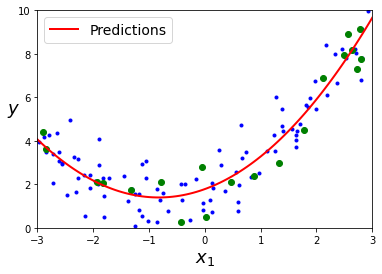

In [8]:
## practice 5.3: Visualized fitted quadratic line on training/testing data
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_test, y_test, "g.", markersize=12)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [9]:
### practice 5.4: get training error using polynomial model
X_poly = poly_features.transform(X)
y_predict = lin_reg.predict(X_poly)

train_error = np.mean((y_predict - y)**2)
print("train_error: ",train_error)

train_error:  0.7771936663502366


In [10]:
### practice 5.5: get testing error using polynomial model
X_test_poly = poly_features.transform(X_test)
y_test_predict = lin_reg.predict(X_test_poly)
test_error = np.mean((y_test_predict - y_test)**2)
print("test_error: ",test_error)

test_error:  0.5725010188552855


Practice 6: Visualize polynomial model with different degrees

Polynomial regression with degree 2 has train error (0.7771936663502366) and test error (0.5725010188552855) 
Polynomial regression with degree 3 has train error (0.7724650788837719) and test error (0.5794235474181721) 
Polynomial regression with degree 4 has train error (0.7635386782209403) and test error (0.5708148689722827) 
Polynomial regression with degree 5 has train error (0.7614741088238346) and test error (0.5480610787347479) 
Polynomial regression with degree 6 has train error (0.7609610036347882) and test error (0.5546845817943657) 
Polynomial regression with degree 7 has train error (0.7607851413683645) and test error (0.5504066060608187) 
Polynomial regression with degree 8 has train error (0.7607839991085714) and test error (0.5504175685122756) 
Polynomial regression with degree 9 has train error (0.7523658959131103) and test error (0.5358505967511815) 
Polynomial regression with degree 10 has train error (0.7399087981911181) and test error (0.5197037079176646) 
Polynomia

([<matplotlib.axis.XTick at 0x7f624a2ea690>,
 <a list of 7 Text major ticklabel objects>)

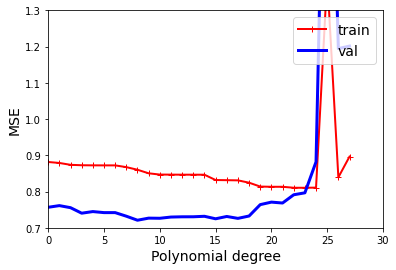

In [11]:
## Practice 6: Visualize polynomial model with different degrees
from sklearn.preprocessing import PolynomialFeatures
train_errors, test_errors = [], []
for degree in range(2,30):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    from sklearn.linear_model import LinearRegression
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)

    ### get training error
    X_poly = poly_features.transform(X)
    y_predict = lin_reg.predict(X_poly)
    train_error = np.mean((y_predict - y)**2)
    train_errors.append(train_error)

    ### get testing error
    X_test_poly = poly_features.transform(X_test)
    y_test_predict = lin_reg.predict(X_test_poly)
    test_error = np.mean((y_test_predict - y_test)**2)
    test_errors.append(test_error)

    print("Polynomial regression with degree %s has train error (%s) and test error (%s) " % (degree,train_error,test_error))

plt.axis([1, 30, 0.7, 1.3])
plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="val")
plt.legend(loc="upper right", fontsize=14) # not shown in the book
plt.xlabel("Polynomial degree", fontsize=14) # not shown
plt.ylabel("MSE", fontsize=14) 

# make the y ticks integers, not floats
xint = []
locs, labels = plt.xticks()
for each in locs:
    xint.append(int(each))

plt.xticks(xint)

**Practice 7: Comparison linear, quadratic, high-degree polynomial model**

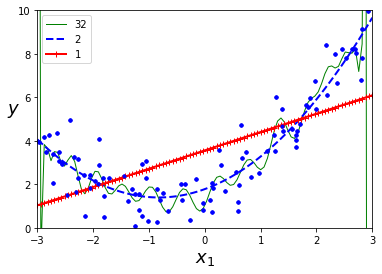

In [18]:
## practice 7: Comparison linear, quadratic, high-degree polynomial model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
for style, width, degree in (("g-", 1, 32), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
          ("poly_features", polybig_features),
          ("std_scaler", std_scaler),
          ("lin_reg", lin_reg),
    ])
    
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)
    plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()